# **Import Necessary Libraries**

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [209]:
df = pd.read_csv('/kaggle/input/anemia-types-classification/diagnosed_cbc_data_v4.csv')

# **Understand And Organize the Dataset**

In [210]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [211]:
df.sample(5)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
56,5.0,32.800,58.400,1.60000,3.00000,4.05,10.3,33.2000,82.0,25.4,31.0,177.0,13.300000,0.16000,Normocytic hypochromic anemia
58,4.5,40.500,53.200,1.80000,2.40000,4.56,8.9,31.3000,68.7,19.5,28.4,77.0,9.700000,0.07000,Iron deficiency anemia
52,6.2,15.000,73.600,0.90000,4.60000,5.17,13.5,38.7000,74.9,26.1,34.8,143.0,16.400000,0.15000,Other microcytic anemia
396,5.7,27.700,65.100,1.60000,3.70000,4.38,11.3,37.2000,85.0,25.7,30.3,161.0,13.100000,0.15000,Normocytic hypochromic anemia
932,10.7,25.845,77.511,1.88076,5.14094,5.17,14.3,46.1526,86.1,27.7,32.1,268.0,14.312512,0.26028,Leukemia


In [212]:
df.shape

(1281, 15)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WBC,1281.0,7.862717,3.564466,0.80,6.00000,7.400000,8.68000,45.7
LYMp,1281.0,25.845000,7.038728,6.20,25.84500,25.845000,25.84500,91.4
NEUTp,1281.0,77.511000,147.746273,0.70,71.10000,77.511000,77.51100,5317.0
LYMn,1281.0,1.880760,1.335689,0.20,1.88076,1.880760,1.88076,41.8
NEUTn,1281.0,5.140940,2.872294,0.50,5.10000,5.140940,5.14094,79.0
RBC,1281.0,4.708267,2.817200,1.36,4.19000,4.600000,5.10000,90.8
HGB,1281.0,12.184551,3.812897,-10.00,10.80000,12.300000,13.50000,87.1
HCT,1281.0,46.152600,104.886100,2.00,39.20000,46.152600,46.15260,3715.0
MCV,1281.0,85.793919,27.177663,-79.30,81.20000,86.600000,90.20000,990.0
MCH,1281.0,32.084840,111.170756,10.90,25.50000,27.800000,29.60000,3117.0


In [215]:
df.describe(include= "object").T

,count,unique,top,freq
Diagnosis,1281,9,Healthy,336


In [216]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [217]:
df.duplicated().sum()

49

In [218]:
duplicates = df[df.duplicated()]

In [219]:
duplicates

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
202,5.60,35.600,56.900,2.00000,3.20000,4.31,11.0,36.3000,84.3,25.5,30.3,171.0,13.100000,0.15000,Normocytic hypochromic anemia
215,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,29.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
247,5.40,27.800,65.800,1.50000,3.60000,4.45,11.3,37.4000,84.2,25.3,30.2,166.0,13.600000,0.15000,Normocytic hypochromic anemia
269,5.90,16.200,78.400,1.00000,4.60000,4.27,11.3,36.5000,85.7,26.4,30.9,155.0,13.100000,0.15000,Normocytic hypochromic anemia
405,8.70,7.300,85.800,0.60000,7.50000,4.44,12.9,39.6000,89.3,29.0,32.5,140.0,11.300000,0.12000,Normocytic normochromic anemia
406,8.30,20.000,70.300,1.70000,5.80000,5.59,10.0,34.7000,62.1,17.8,28.8,203.0,12.800000,0.17000,Iron deficiency anemia
407,5.40,11.300,81.600,0.60000,4.40000,3.72,9.8,32.1000,86.4,26.3,30.5,125.0,12.000000,0.11000,Normocytic hypochromic anemia
411,8.70,7.300,85.800,0.60000,7.50000,4.44,12.9,39.6000,89.3,29.0,32.5,140.0,11.300000,0.12000,Normocytic normochromic anemia
439,8.50,19.600,71.500,1.70000,6.00000,3.59,8.7,28.5000,79.5,24.2,30.5,122.0,11.300000,0.10000,Iron deficiency anemia
441,3.20,35.600,56.200,1.10000,1.80000,5.22,14.9,45.8000,87.8,28.5,32.5,132.0,14.300000,0.13000,Thrombocytopenia


In [220]:
df = df.drop_duplicates(keep='first')

In [221]:
df.shape

(1232, 15)

# **EDA (Exploratory Data Analysis)**

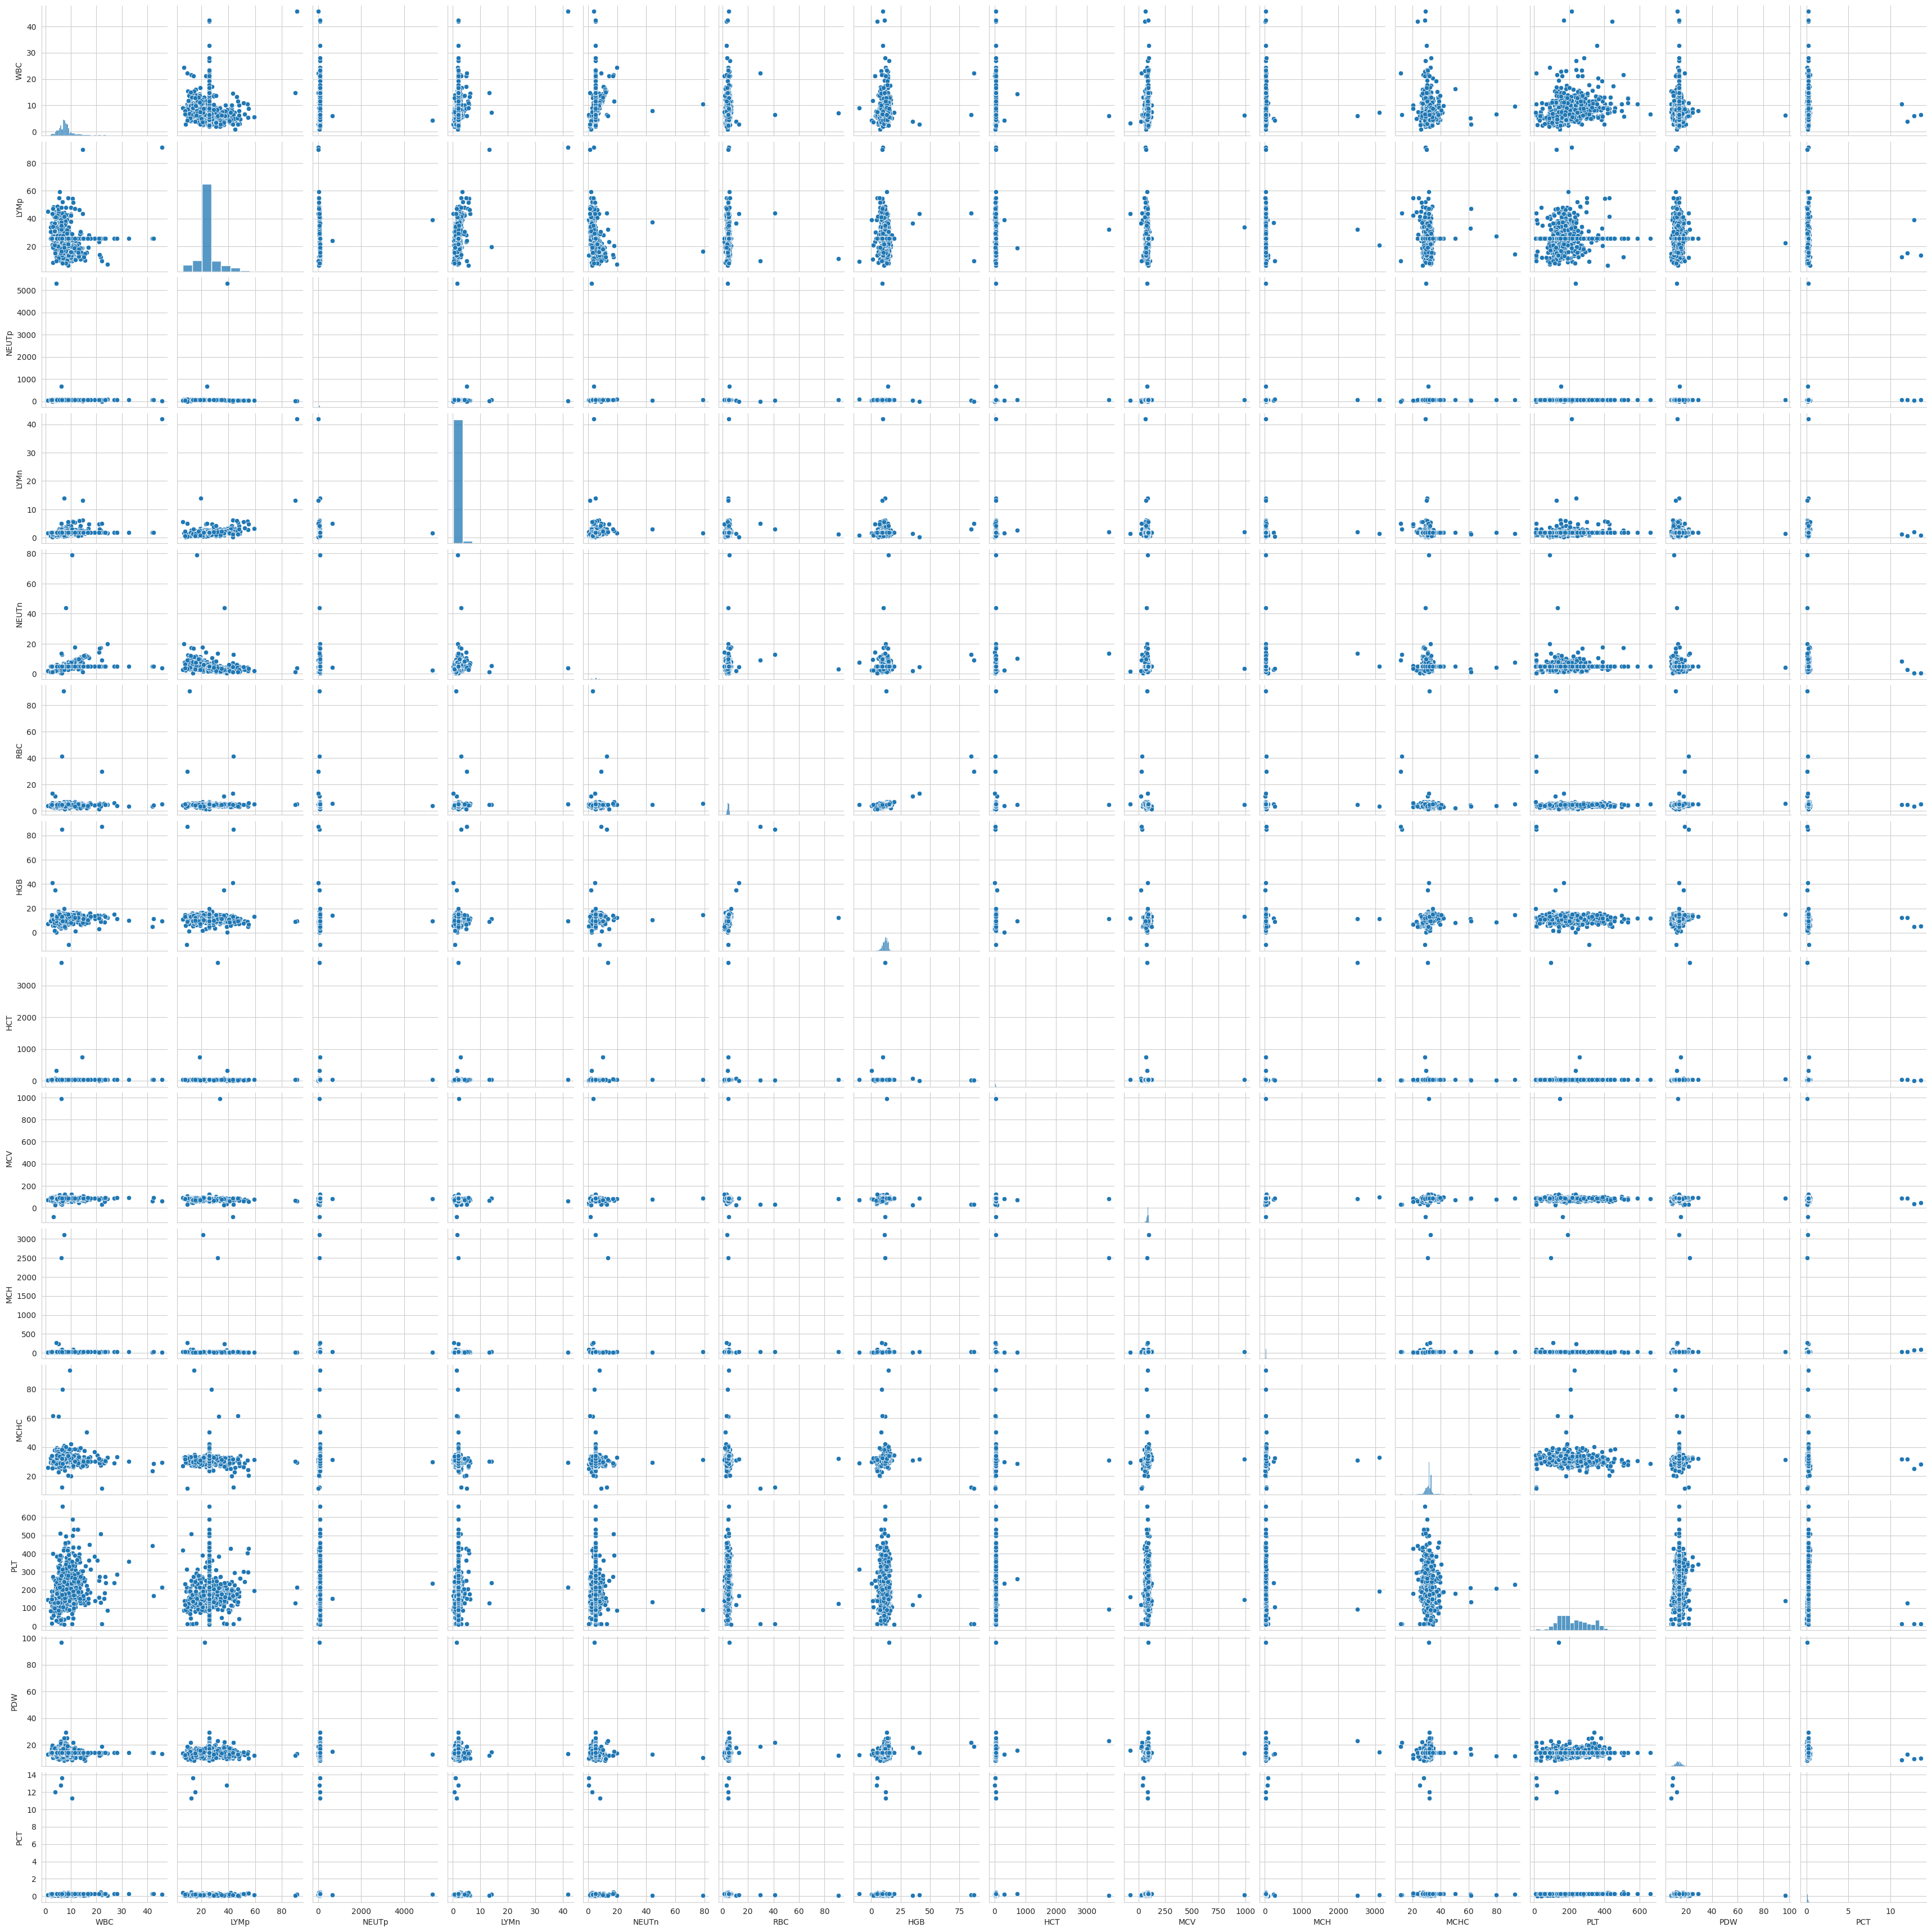

In [222]:
sns.pairplot(df);

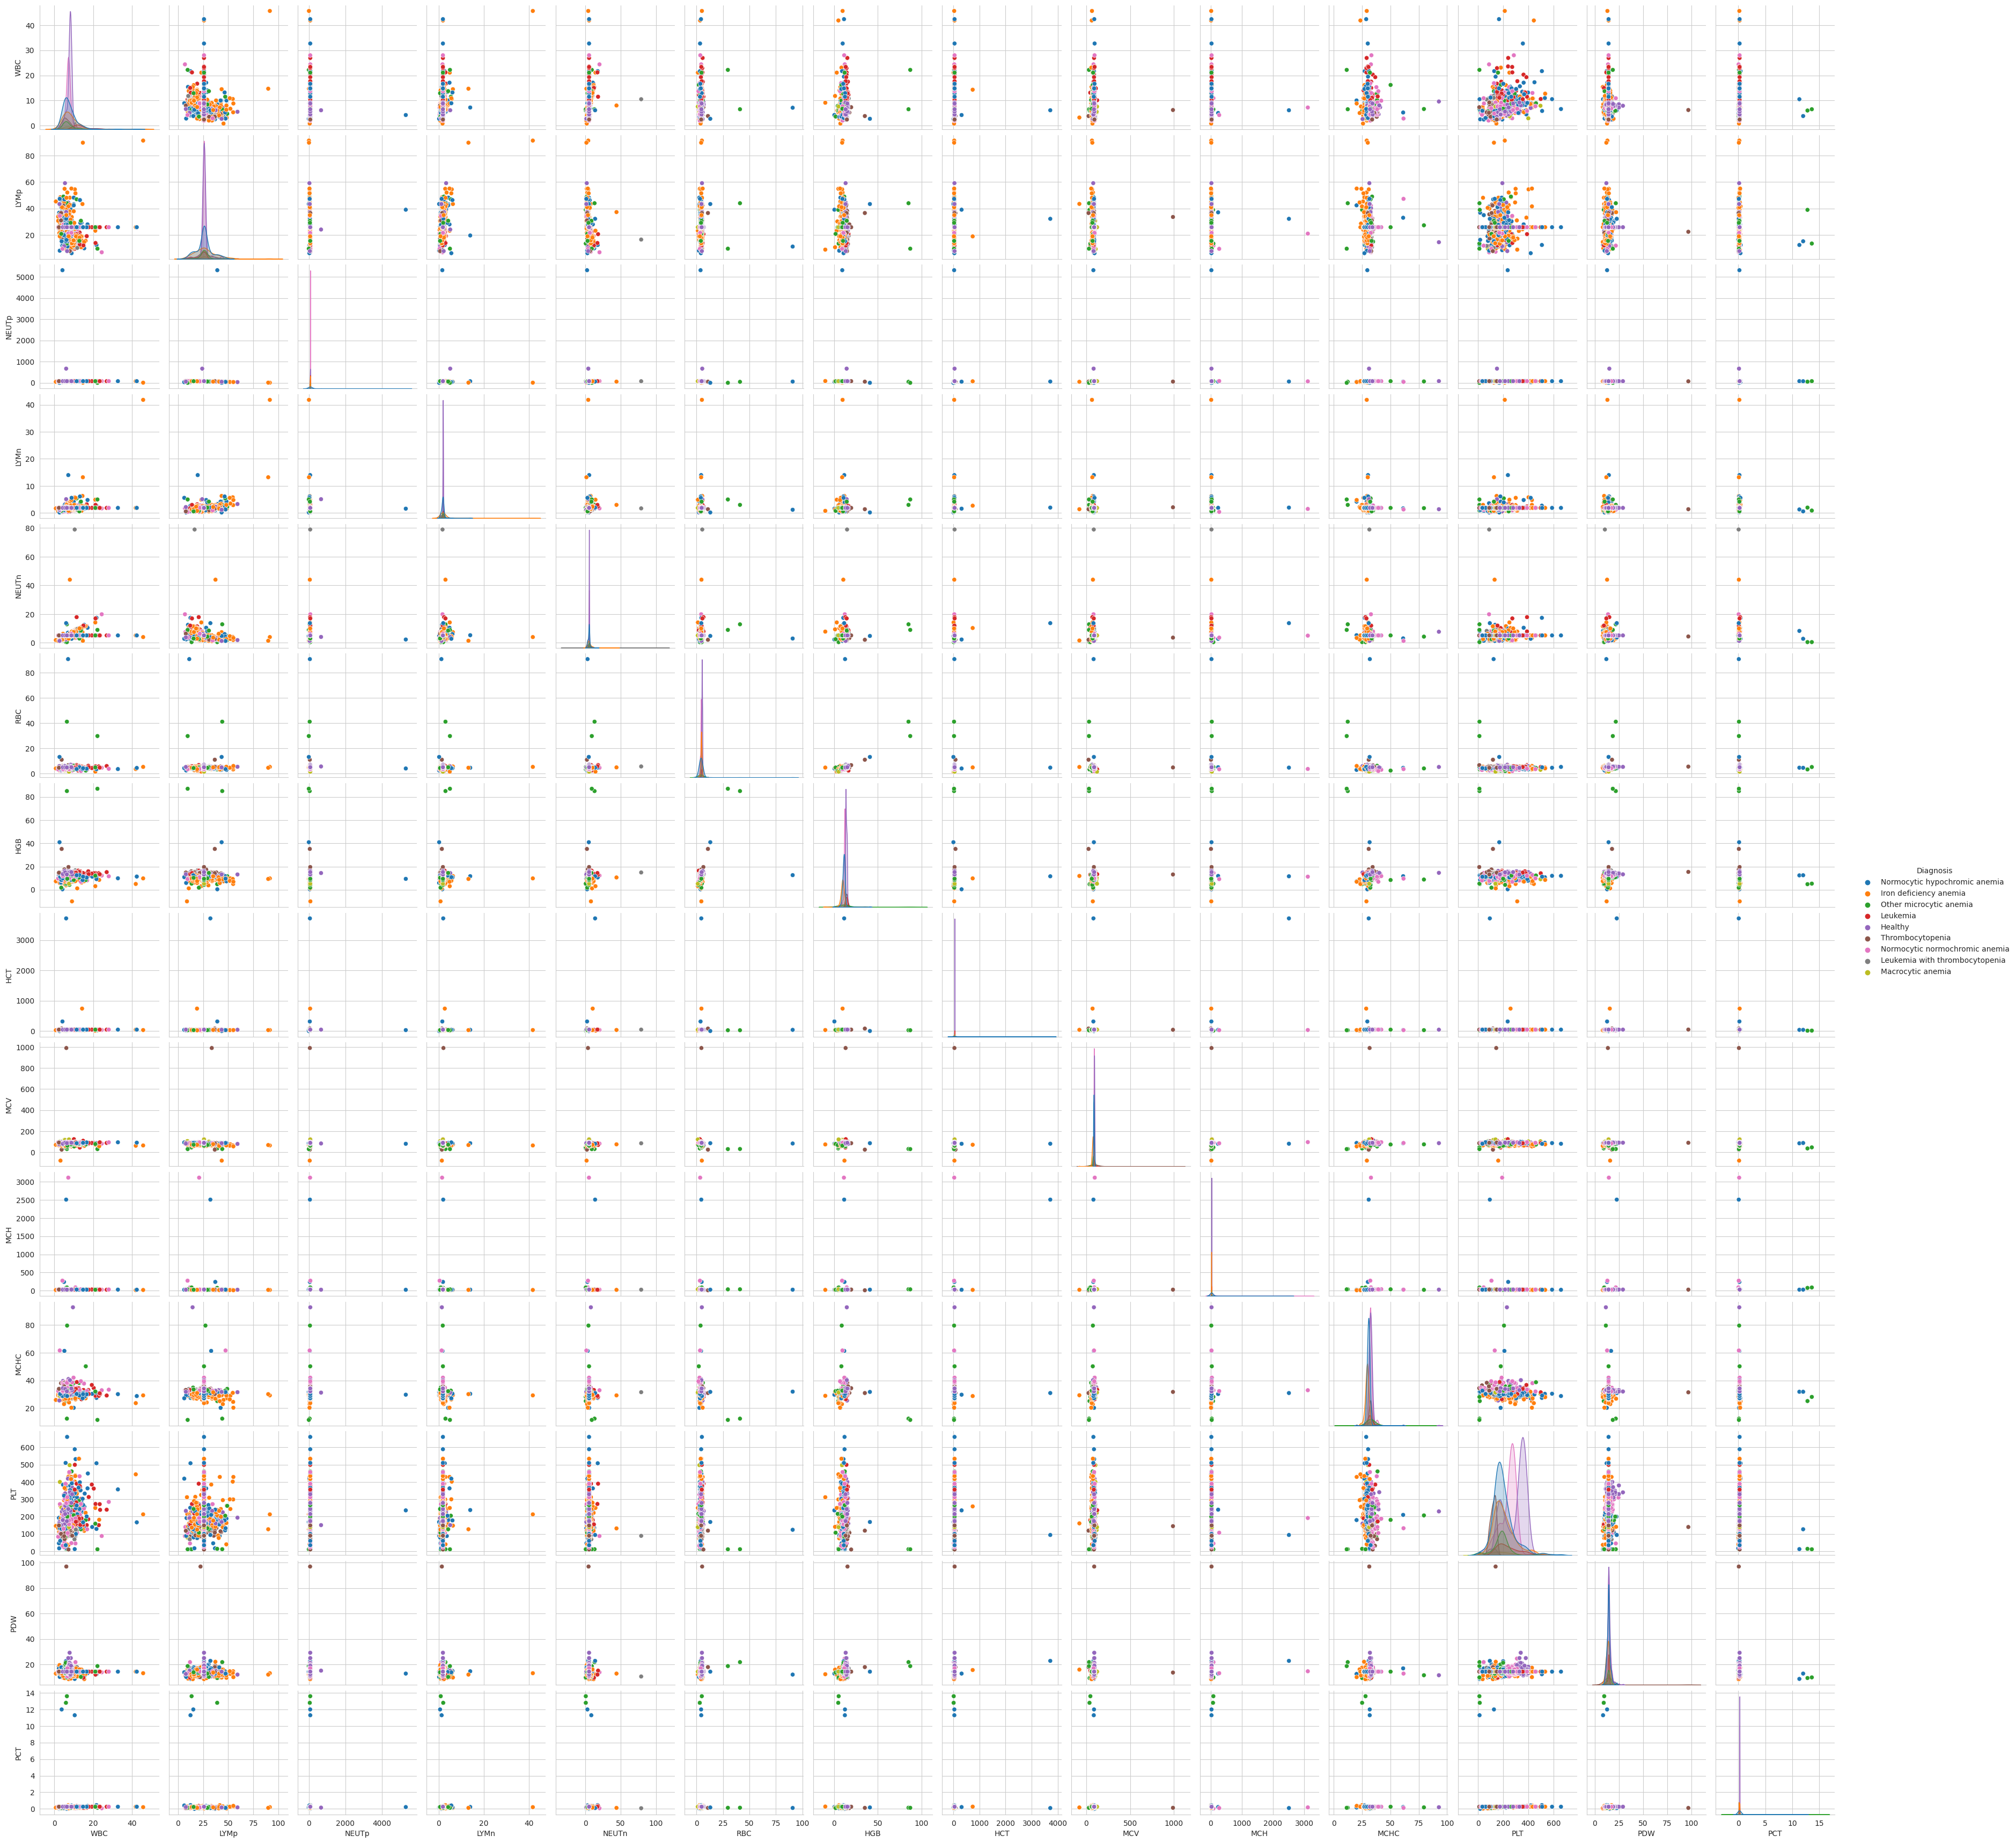

In [223]:
sns.pairplot(df, hue='Diagnosis');

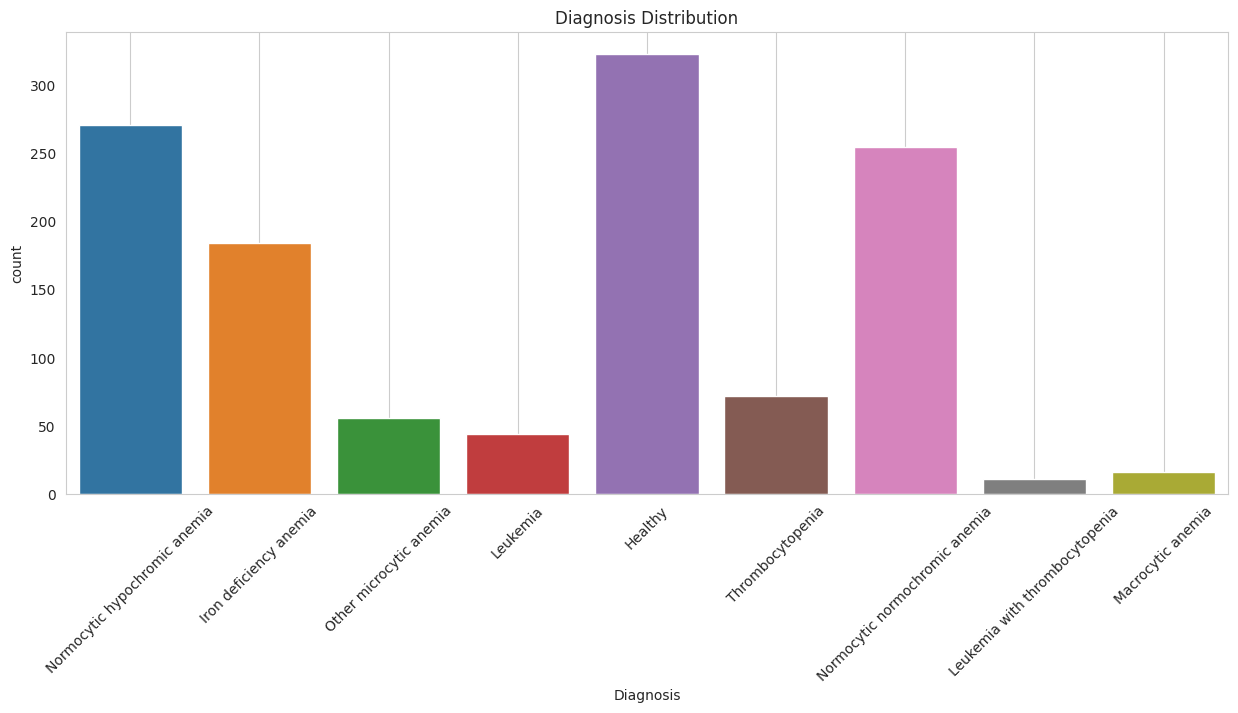

In [224]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Diagnosis')
plt.title('Diagnosis Distribution')
plt.xticks(rotation=45)
plt.grid()
plt.show()

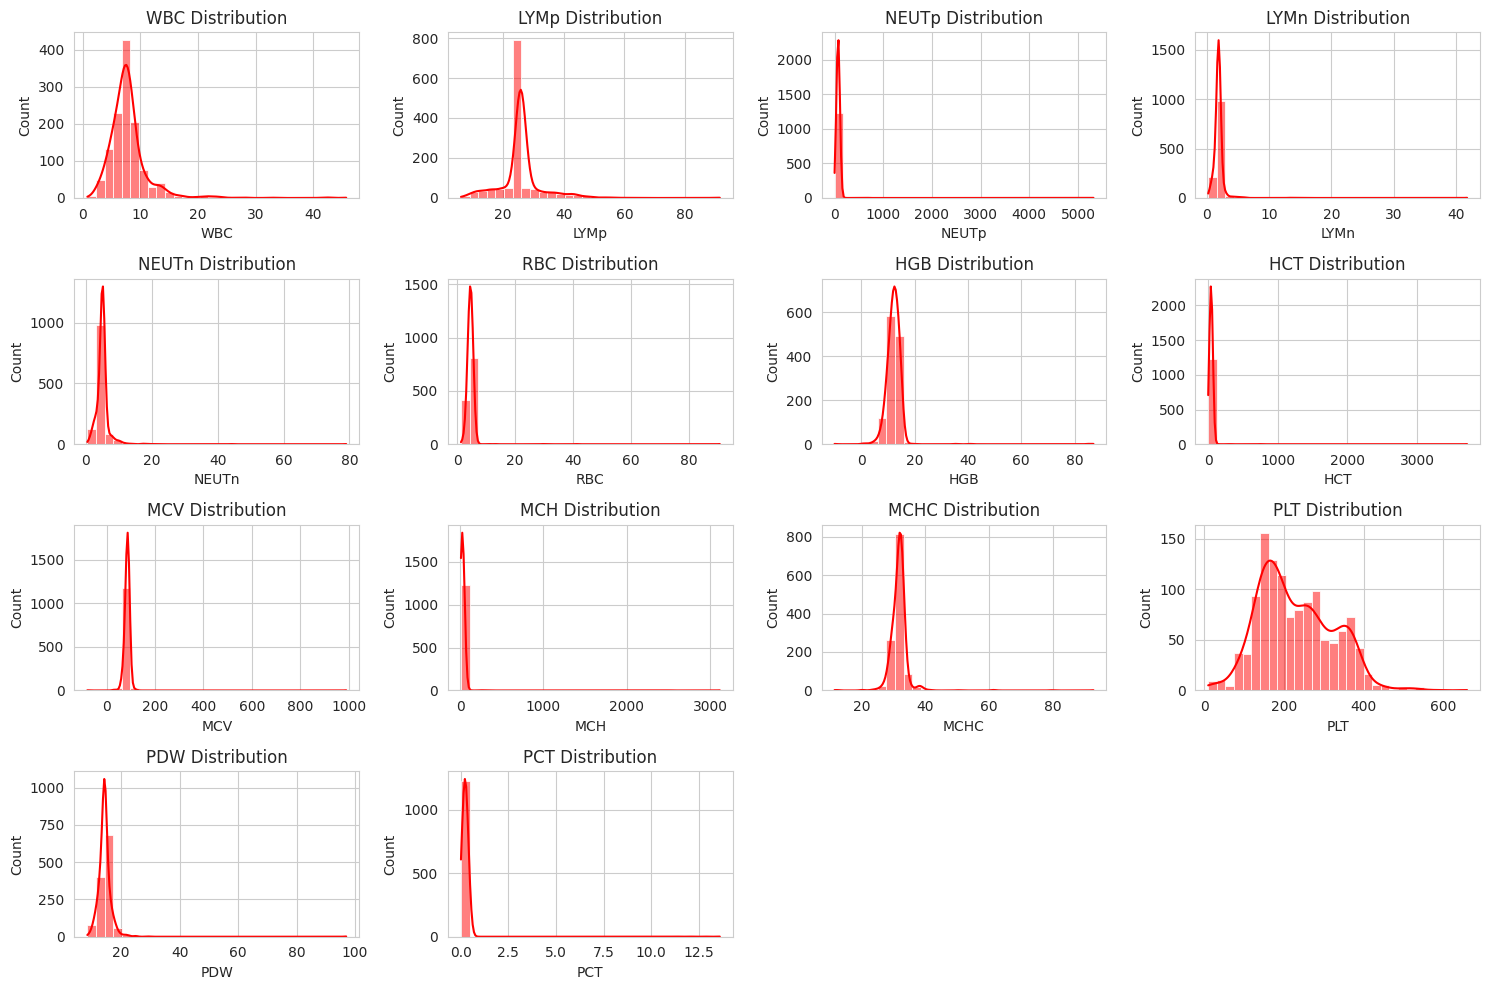

In [225]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color='red')
    plt.title(f'{col} Distribution')
    plt.grid(True)
plt.tight_layout()
plt.show()

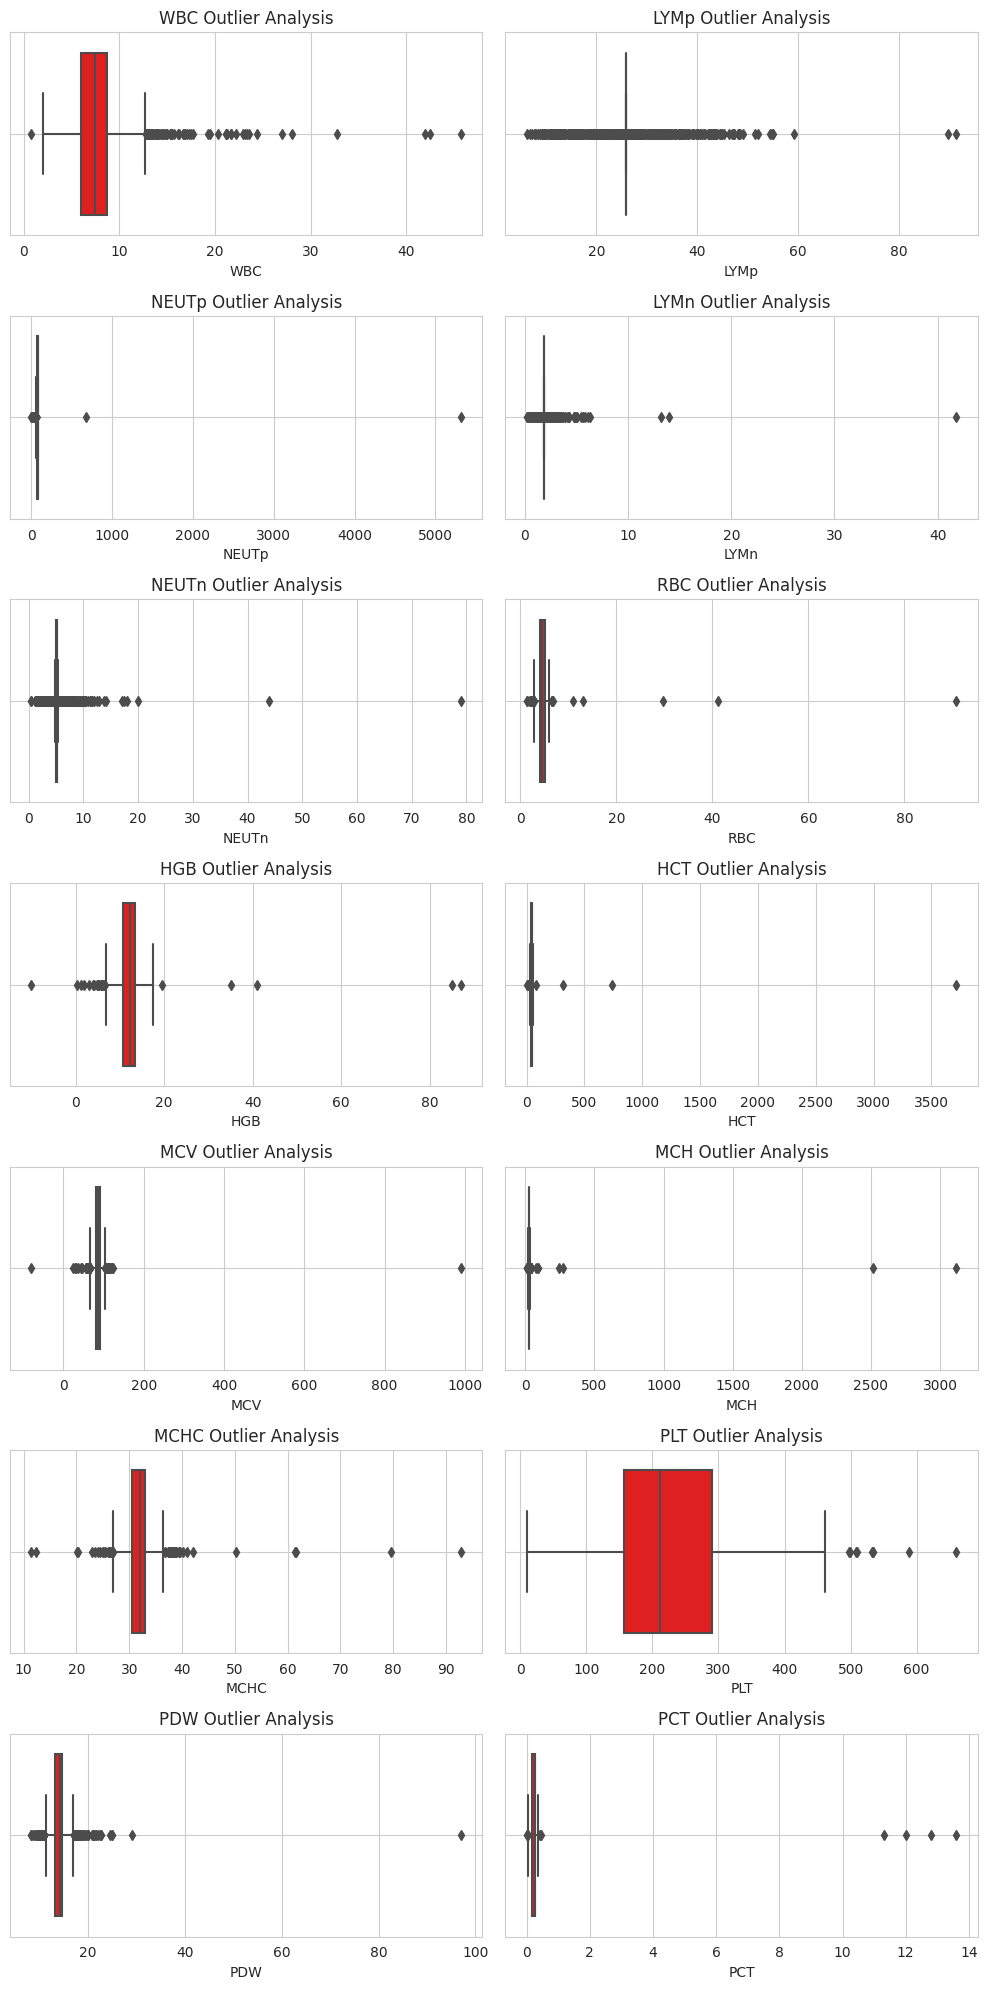

In [226]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(num_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x=df[col], color='red')
    plt.title(f'{col} Outlier Analysis')
    plt.grid(True)
plt.tight_layout()
plt.show()

# **Label Encoding**

In [228]:
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [229]:
le.classes_

array(['Healthy', 'Iron deficiency anemia', 'Leukemia',
       'Leukemia with thrombocytopenia', 'Macrocytic anemia',
       'Normocytic hypochromic anemia', 'Normocytic normochromic anemia',
       'Other microcytic anemia', 'Thrombocytopenia'], dtype=object)

In [230]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,5
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,5
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,1
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,1
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,5


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1232 non-null   float64
 1   LYMp       1232 non-null   float64
 2   NEUTp      1232 non-null   float64
 3   LYMn       1232 non-null   float64
 4   NEUTn      1232 non-null   float64
 5   RBC        1232 non-null   float64
 6   HGB        1232 non-null   float64
 7   HCT        1232 non-null   float64
 8   MCV        1232 non-null   float64
 9   MCH        1232 non-null   float64
 10  MCHC       1232 non-null   float64
 11  PLT        1232 non-null   float64
 12  PDW        1232 non-null   float64
 13  PCT        1232 non-null   float64
 14  Diagnosis  1232 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 154.0 KB


# **EDA (Exploratory Data Analysis) Part 2**

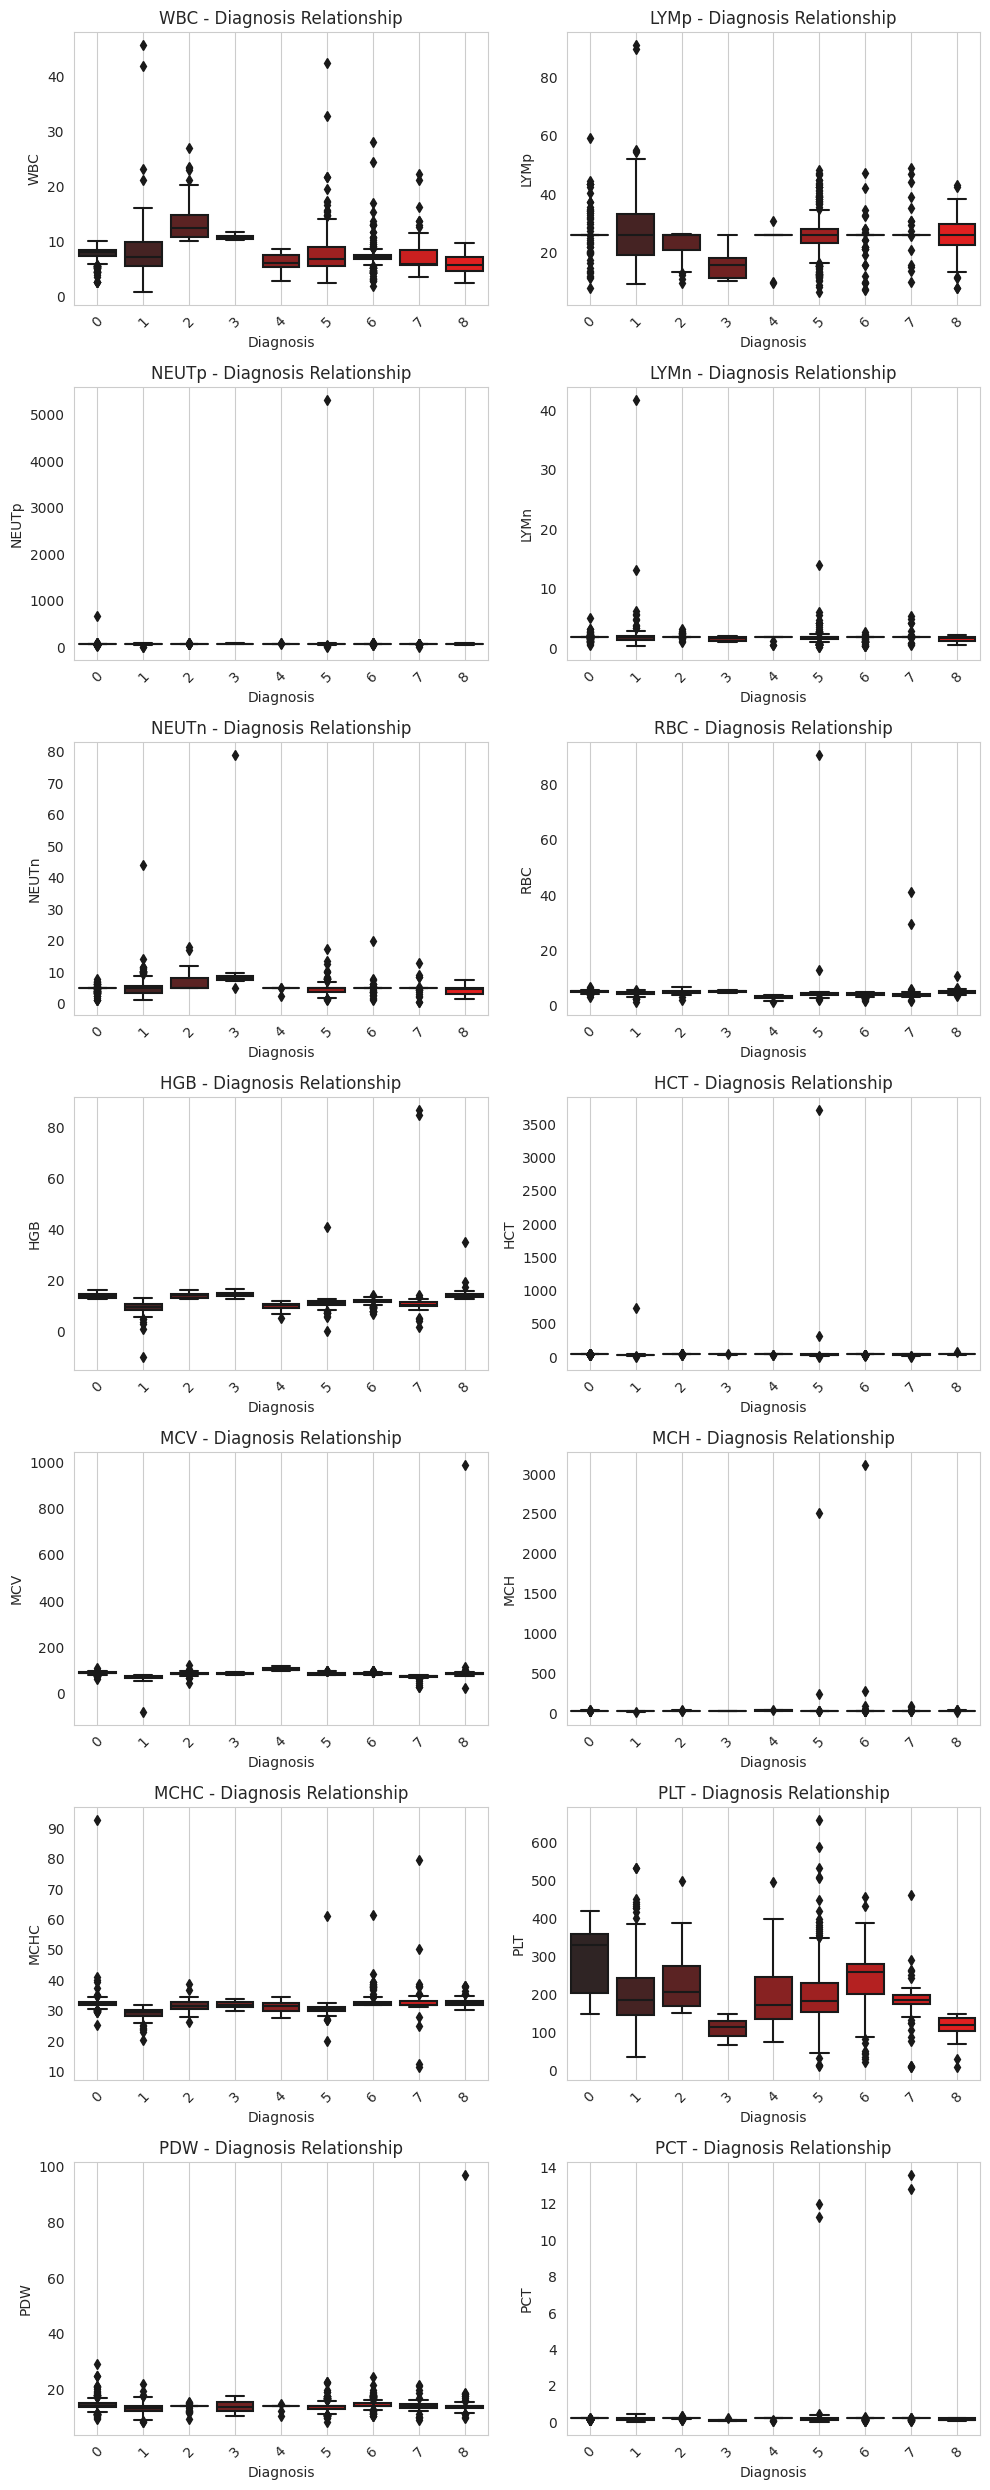

In [232]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x='Diagnosis', y=col, data=df, palette='dark:red')
    plt.title(f'{col} - Diagnosis Relationship')
    plt.xticks(rotation=45)
    plt.grid()
plt.tight_layout()
plt.show()

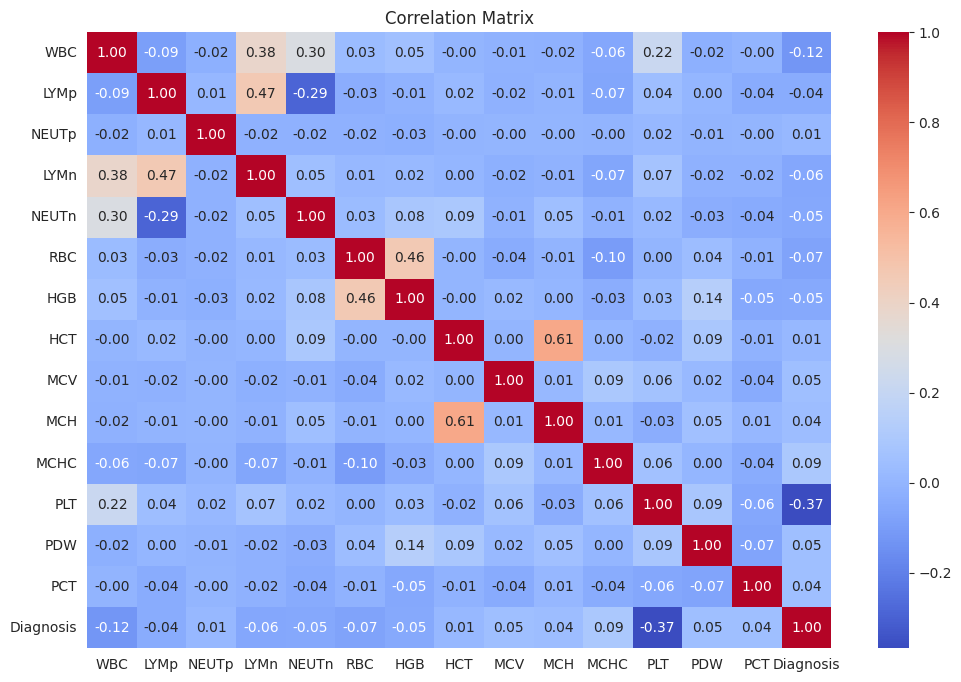

In [233]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Preprocessing**

In [234]:
x = df.drop('Diagnosis', axis=1).values
y = df['Diagnosis'].values

y = y.astype("float32")
x = x.astype("float32")

In [235]:
y = to_categorical(y)

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

## **Scaling**

In [237]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Model Building**

In [254]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = x.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(y.shape[1], activation='softmax'))

## **EarlyStopping**

In [256]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.7460 - loss: 0.7840 - val_accuracy: 0.7692 - val_loss: 0.8037
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7757 - loss: 0.7160 - val_accuracy: 0.7733 - val_loss: 0.8500
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7801 - loss: 0.7061 - val_accuracy: 0.7814 - val_loss: 0.7415
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.7411 - val_accuracy: 0.8016 - val_loss: 0.7557
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7609 - loss: 0.7516 - val_accuracy: 0.7895 - val_loss: 0.8207
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7817 - loss: 0.6647 - val_accuracy: 0.8097 - val_loss: 0.8022
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.6761 - val_accuracy: 0.8138 - val_loss: 0.7439
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.6814 - val_accuracy: 0.8219 -

In [257]:
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)                    │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_89               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 9)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,989 (160.12 KB)

 Trainable params: 13,497 (52.72 KB)

 Non-trainable params: 496 (1.94 KB)

 Optimizer params: 26,996 (105.46 KB)

In [258]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.4411 
Test Accuracy: 0.8826


# **Visualization of the Model's Results**

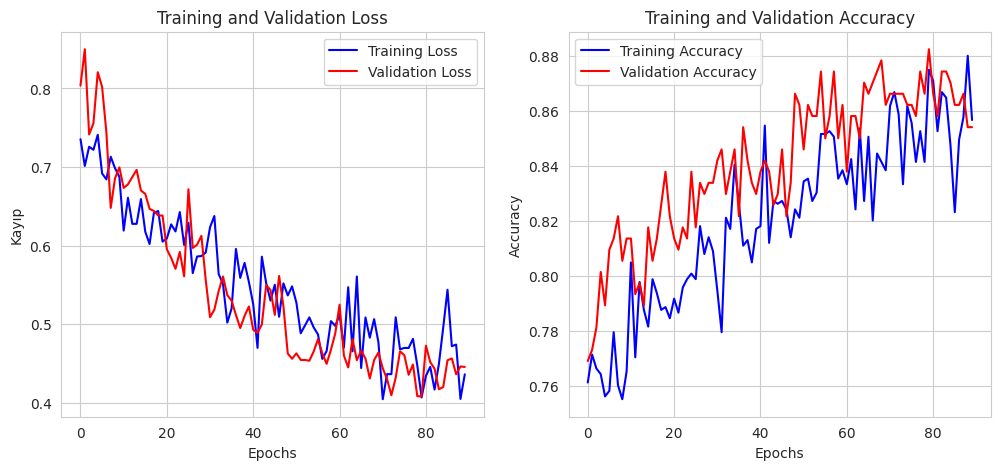

In [259]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Training Loss', color='b')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Training Accuracy', color='b')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


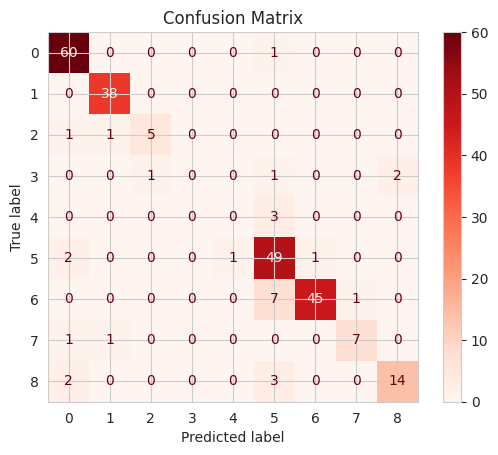

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.grid("False")
plt.show()

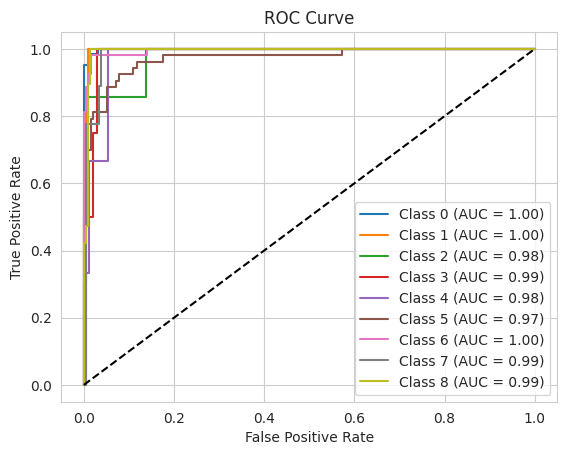

In [261]:
from sklearn.metrics import roc_curve, auc

for i in range(y.shape[1]):
    fpr, tpr, _ = roc_curve(y_true, y_pred[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()